### Section : Scikit-Learn and Machine Learning

In [1]:
# Custom modules for algorithms and helper functions
from Helpers import plot_decision_regions

# Scikit-Learn Imports
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Base Computation Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt

df = pd.read_csv('Iris_Dataset.csv', index_col=0)

X = df.iloc[:, [2, 3]]
y = df.iloc[:, [4]].values.ravel()


# Stratify ensures that each class is assigned equal number of samples
# for both test and train splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)


# Standardizing the dataset
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

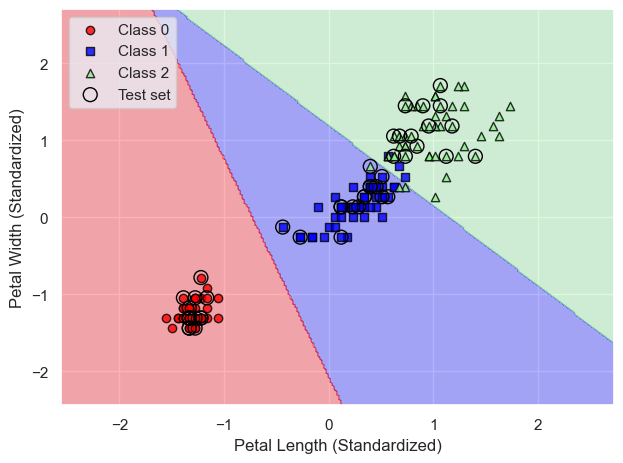

In [2]:
# Training a model using sklearn's LogisticRegression class
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

# Plotting the regions
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(
    X_combined_std,
    y_combined,
    classifier=lr,
    test_idx=range(105, 150)
)
plt.xlabel('Petal Length (Standardized)')
plt.ylabel('Petal Width (Standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./Results/5_LogisticRegression_sklearn_ovr.png')
plt.show()

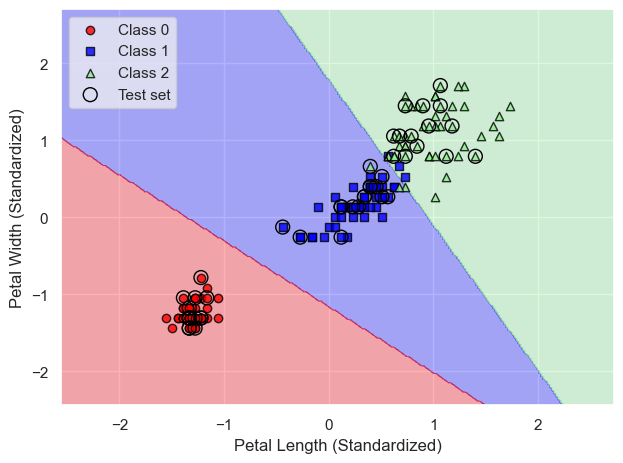

In [3]:
# Training a model using sklearn's LogisticRegression class (multinomial)
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train_std, y_train)

# Plotting the regions
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(
    X_combined_std,
    y_combined,
    classifier=lr,
    test_idx=range(105, 150)
)
plt.xlabel('Petal Length (Standardized)')
plt.ylabel('Petal Width (Standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./Results/5_LogisticRegression_sklearn_multinomial.png')
plt.show()

In [4]:
# Probablities of first 3 samples being in a specific class
np.set_printoptions(precision=3, suppress=True)
display(lr.predict_proba(X_test_std[:3, :]))
display(y_test[:3])

array([[0.   , 0.   , 1.   ],
       [0.994, 0.006, 0.   ],
       [0.999, 0.001, 0.   ]])

array([2, 0, 0], dtype=int64)

In [5]:
predictions = lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)
if predictions.all() == y_test[:3].all():
    print('All predictions are correct')
else:
    print('All predictions are not correct')

All predictions are correct


In [6]:
# Predicting class of a single test sample
# sklearn expects two dimensional arrays, so to avoid errors we need to reshape a single value into
# a 2-D array using reshape

test_sample = X_test_std[0, :].reshape(1, -1)
lr.predict(test_sample)

array([2], dtype=int64)

### Section : Overfitting and Regularization

__Overfitting__: When a model performs well on training data but not satisfactorily on test (unseen) data, then the model is said to be overfitting. In this case the model is unable to generalize well for unseen data. 

When a model suffers from overfitting it is also said that the model has high variance. High variance can be caused by having too many parameters, leading to a model that is too complex for the underlying data. 

__Underfitting:__ When a model is not complex enough to capture the pattern in training data well, then it also suffers from low performance on test (unseen) data. Then such a model is said to be underfitting.

__Bias-Variance Tradeoff__: In general, we can say that high variance is proportional to overfitting and high bias is proportional to underfitting. 

In the context of machine learning models, variance measures the consistency (or variability) of the model prediction for classifying a particular sample data if we retrain the model multiple times, for example, on different subsets of the training data. If variance is high we can say that the model is sensitive to the randomness in the training data. 

In contrast, bias measures how far off the predictions are from the correct values in general if we rebuild the model multiple times on different datasets; bias is the measure of the systematic error that is not due to randomness. 

One way of finding a good bias-variance tradeoff is to tune the complexity of the model via regularization. Regularization is useful for handling high collinearity (high correlation among features), filtering out noise from data, and eventually preventing overfitting.

__Regularization:__ The concept behind regularization is to introduce additional information to penalize extreme parameter (weight) values. The most common form of regularization is called __L2 Regularization__ (sometimes also calle L2 shrinkage or weight decay).

Regularization is another reason why feature scaling such as standardization is important. For regularization to work properly, we need to ensure that all our features are on comparable scales.

$$$$


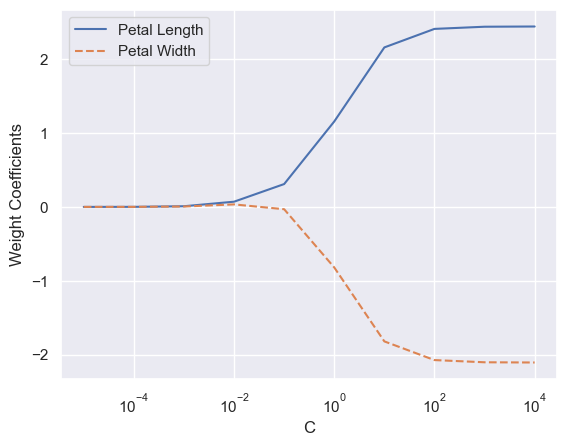

In [7]:
# The term C is inversely proportional to the Regularization parameter. 
# Thus decreasing the value of inverse regularization parameter C, 
# means that we are increasing the regularization strength, 
# which we can visualize by plotting L2 regularization path
# for the two weight coefficients 

weights, params = [], []

for c in np.arange(-5, 5):
    lr = LogisticRegression(C=np.power(10.0, c), multi_class="ovr")
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(np.power(10.0, c))

weights = np.array(weights)
plt.plot(params, weights[:, 0], label='Petal Length')
plt.plot(params, weights[:, 1], linestyle='--', label='Petal Width')
plt.ylabel('Weight Coefficients')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.savefig('./Results/6_Regularization_Vs_C.png')
plt.show()

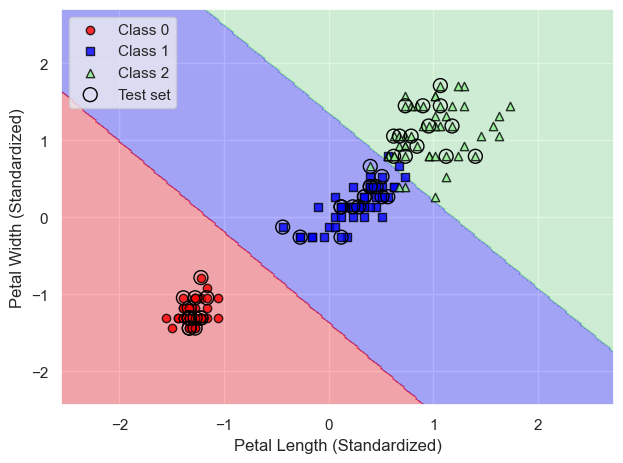

In [8]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X=X_train_std, y=y_train)
plot_decision_regions(
    X=X_combined_std,
    y=y_combined,
    classifier=svm,
    test_idx=range(105, 150)
)
plt.xlabel('Petal Length (Standardized)')
plt.ylabel('Petal Width (Standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./Results/7_SVM_Regions.png')
plt.show()

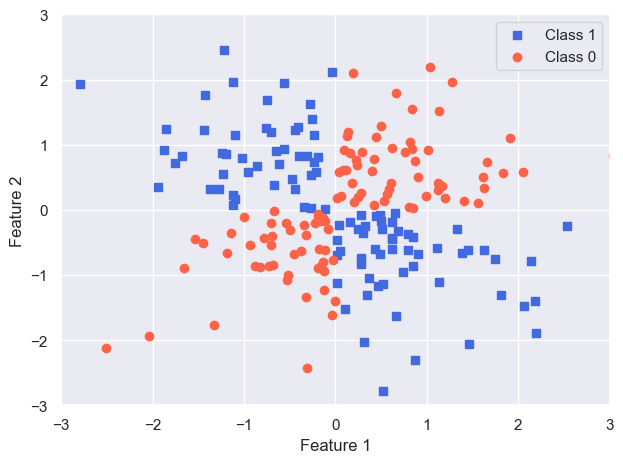

In [9]:
# Constructing an Artifical Dataset for Kernel SVM
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(
    X_xor[:, 0] > 0,
    X_xor[:, 1] > 0
)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(
    X_xor[y_xor == 1, 0],
    X_xor[y_xor == 1, 1],
    c='royalblue',
    marker='s',
    label='Class 1'
)
plt.scatter(
    X_xor[y_xor == 0, 0],
    X_xor[y_xor == 0, 1],
    c='tomato',
    marker='o',
    label='Class 0'
)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('./Results/8_XOR_Dataset.png')
plt.show()

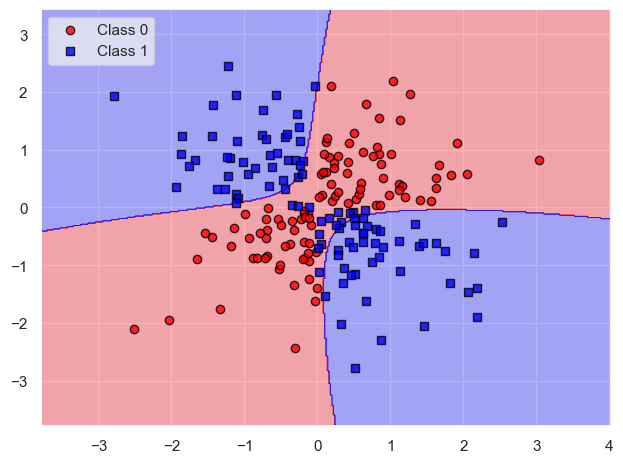

In [10]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./Results/9_XOR_SVM_Region.png')
plt.show()

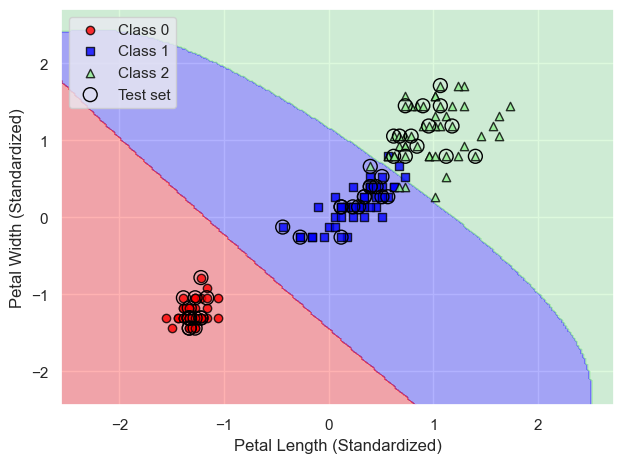

In [11]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(
    X_combined_std,
    y_combined,
    classifier=svm,
    test_idx=range(105, 150)
)
plt.xlabel('Petal Length (Standardized)')
plt.ylabel('Petal Width (Standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./Results/10_SVM_Regions_Iris.png')
plt.show()

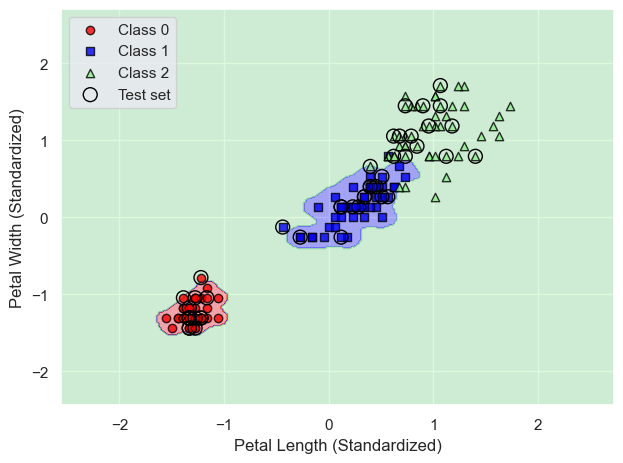

In [12]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(
    X_combined_std,
    y_combined,
    classifier=svm,
    test_idx=range(105, 150)
)
plt.xlabel('Petal Length (Standardized)')
plt.ylabel('Petal Width (Standardized)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./Results/11_SVM_Regions_Iris_High_gamma.png')
plt.show()